In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import preprocessing,model_selection
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [3]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=['id','clump thickness','uniform cell size','uniform cell shape','marginal adhesion','single epithelial cell size','bare nuclei'
    ,'bland chromatin','normal nucleoli','mitoses','class']
df=pd.read_csv(url,names=names)

In [4]:
df.replace('?',-999,inplace=True)
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump thickness', 'uniform cell size', 'uniform cell shape',
       'marginal adhesion', 'single epithelial cell size', 'bare nuclei',
       'bland chromatin', 'normal nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [5]:
df.drop(['id'],1,inplace=True)

In [6]:
df.head()

,clump thickness,uniform cell size,uniform cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [7]:
df.describe()

,clump thickness,uniform cell size,uniform cell shape,marginal adhesion,single epithelial cell size,bland chromatin,normal nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
print(df.shape)

(699, 10)


In [9]:
print(df.loc[698])

clump thickness                 4
uniform cell size               8
uniform cell shape              8
marginal adhesion               5
single epithelial cell size     4
bare nuclei                     5
bland chromatin                10
normal nucleoli                 4
mitoses                         1
class                           4
Name: 698, dtype: object


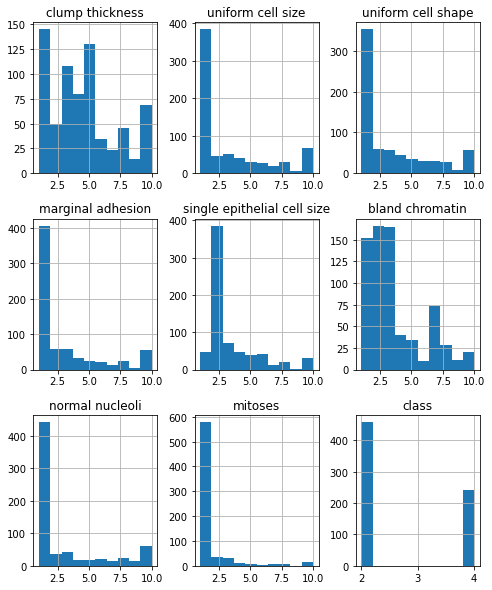

In [10]:
df.hist(figsize=(8,10))
plt.show()

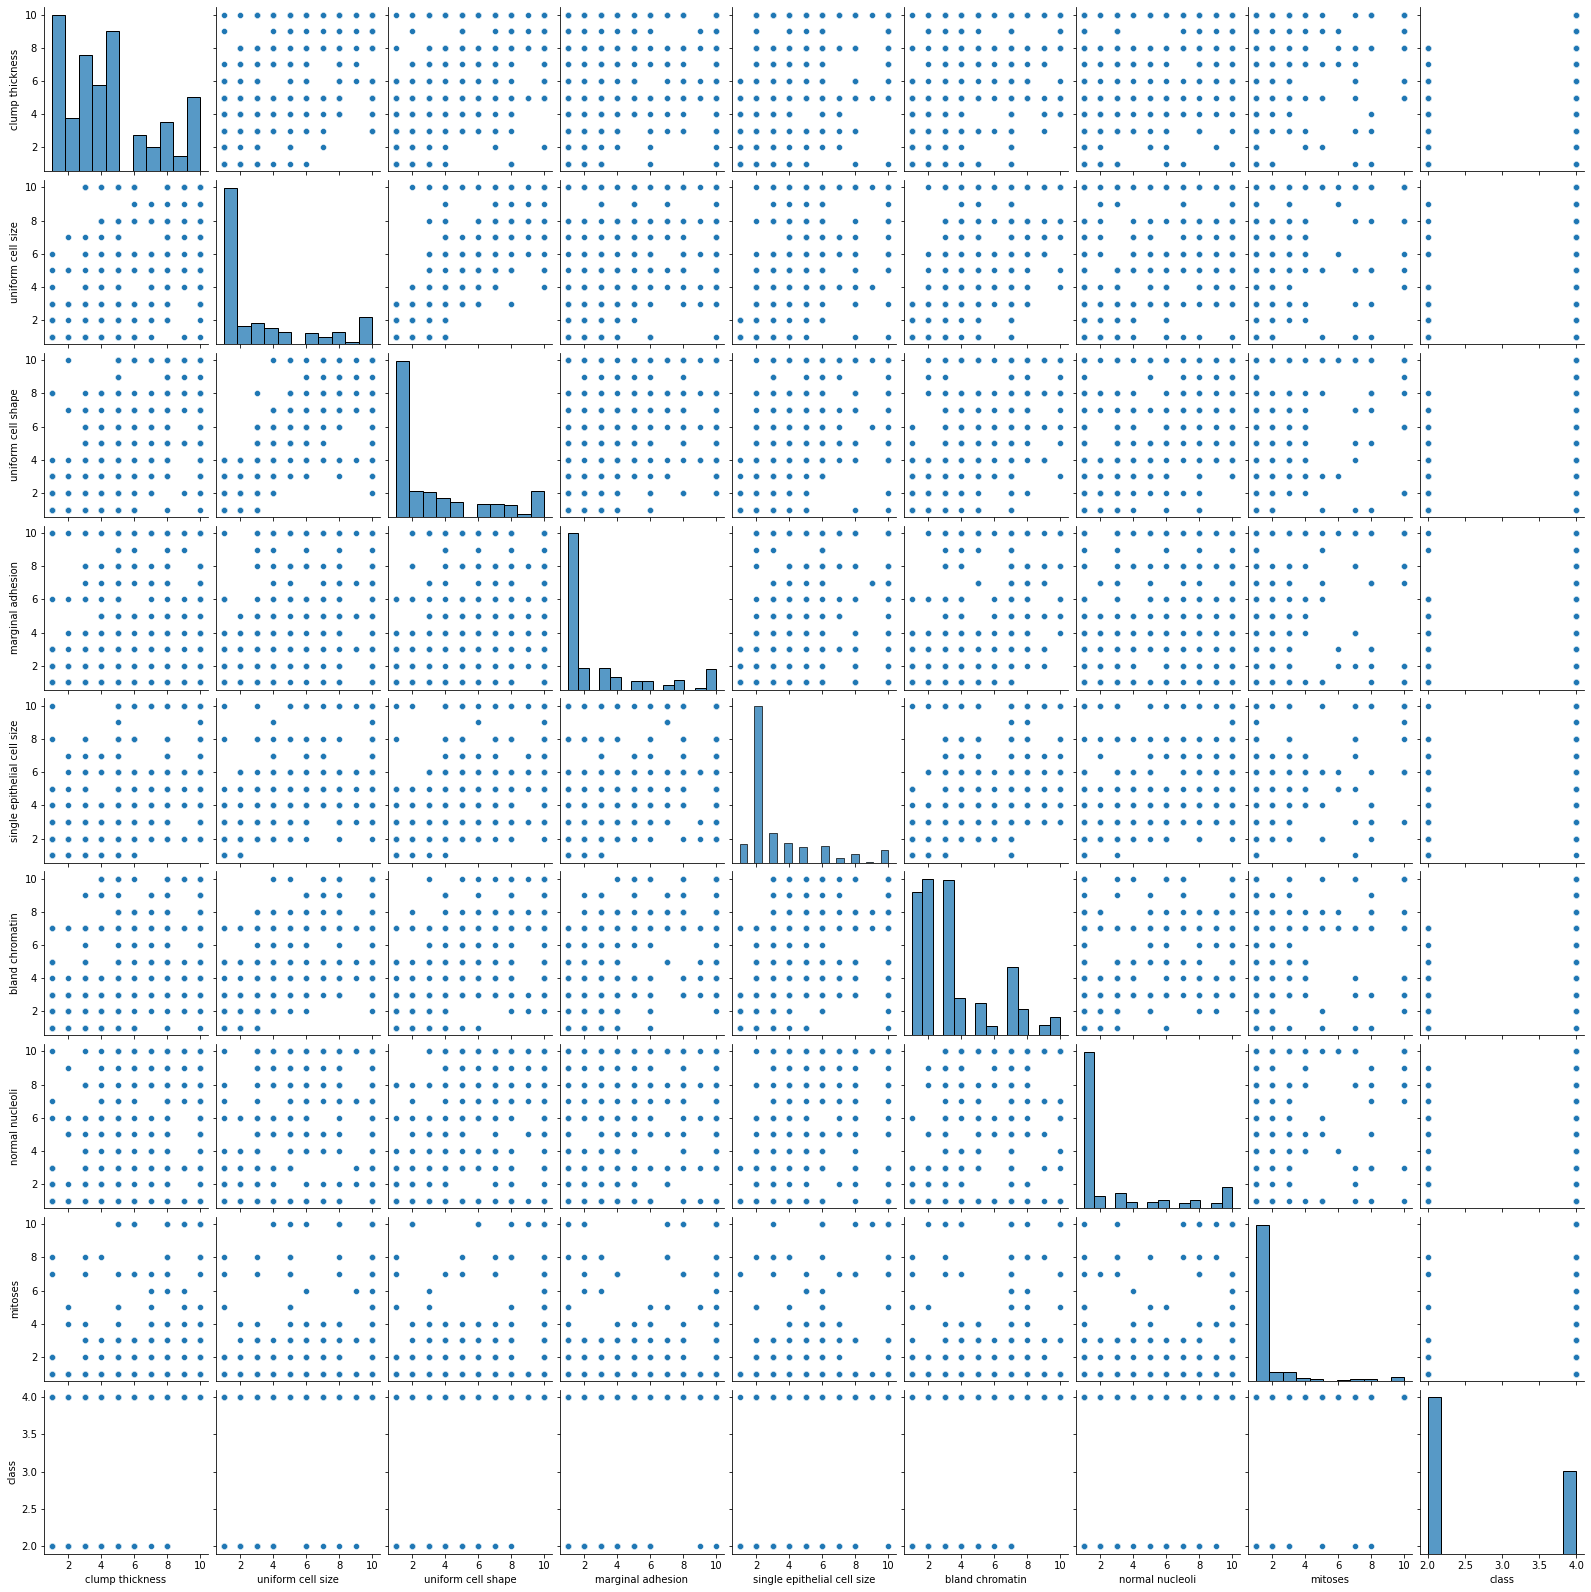

In [11]:
sns.pairplot(df)

In [91]:
from sklearn.model_selection import train_test_split


In [92]:
X=np.array(df.drop(['class'],1))
y=np.array(df['class'])

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [94]:
seed=8
scoring='accuracy'

In [95]:
models=[]
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))



for name,model in models:
    Kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    msg="%s %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

KNN 0.967946 (0.025641)
SVM 0.937928 (0.031112)


C:\Users\poushalidas2001\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\poushalidas2001\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [96]:
for name,model in models:
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))

KNN
0.974025974025974
              precision    recall  f1-score   support

           2       0.99      0.97      0.98       146
           4       0.94      0.99      0.97        85

    accuracy                           0.97       231
   macro avg       0.97      0.98      0.97       231
weighted avg       0.97      0.97      0.97       231

SVM
0.9696969696969697
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       146
           4       0.98      0.94      0.96        85

    accuracy                           0.97       231
   macro avg       0.97      0.96      0.97       231
weighted avg       0.97      0.97      0.97       231



In [97]:
clf=SVC()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)
example=np.array([[4,2,1,1,1,2,3,2,82]])
example=example.reshape(len(example),-1)
predi=clf.predict(example)
print(predi)

0.9696969696969697
[2]
